
# ML - Linear Models


In [16]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np



All linear models learn coeff_ and intercept_ to make predictions.

__y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept___

The differences between models is all about penalty and restrictions are put on coef_. The classical "linear model" is in fact 'ordinary least square regression'.

In [62]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True)
print('True coefficients:', true_coefficient)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)
print('X shape:', X.shape)
print('X_train shape:', X_train.shape)
print(y_train.shape)

True coefficients: [  0.          10.42850417   0.           0.          15.3979446    0.           0.
  67.23493447   0.           0.           0.           5.54092136
  24.92787745  88.8274217   16.65192355   0.           0.           0.
  18.61214447  84.57541241   0.           0.           0.          38.21658829
   0.           0.           0.           0.           0.           0.        ]
X shape: (200, 30)
X_train shape: (60, 30)
(60,)


## Linear regression
[A nice introduction in French](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-regsim)


$\min{w,b}\sum{i}{x}$

In [63]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print('R^2 on training set: ', linear_regression.score(X_train, y_train))
print('R^2 on test set: ', linear_regression.score(X_test, y_test))

R^2 on training set:  0.873748472855
R^2 on test set:  0.331653745979


In [64]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.549996336695


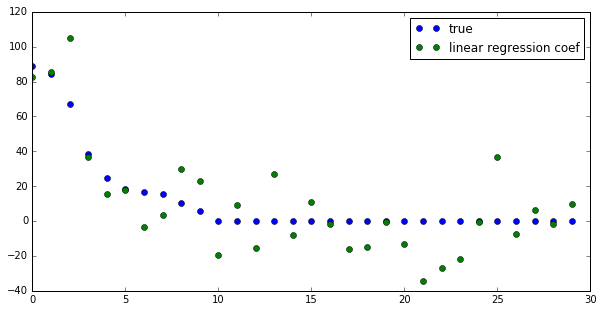

In [65]:
plt.figure(figsize=(10,5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], 'o', label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], 'o', label='linear regression coef')
plt.legend()

training set size :  [ 13  43  73 103 133]


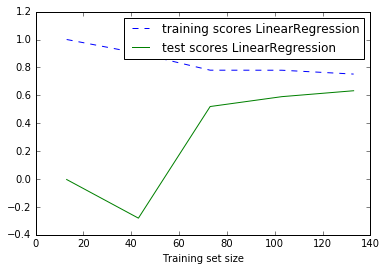

If alpha = 0, it act exactly as linear regression
training set size :  [ 13  43  73 103 133]


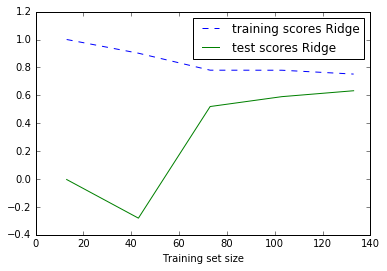

If alpha > 0, the minimization tries also to minimize the coeff (the idea is to get rid of all useless features)
training set size :  [ 13  43  73 103 133]


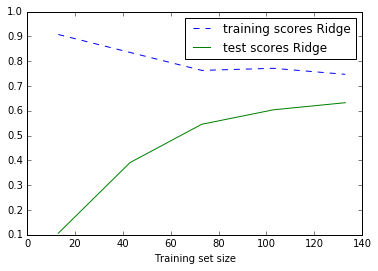

In [82]:
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import Ridge

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y)
    print('training set size : ', training_set_size)
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label = 'training scores ' +  estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label='test scores ' + estimator_name)
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim =(-0.1, 1.1)

plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plt.show()
print('If alpha = 0, it act exactly as linear regression')
plot_learning_curve(Ridge(alpha=0), X, y)
plt.show()

print('If alpha > 0, the minimization tries also to minimize the coeff (the idea is to get rid of all useless features)')
plot_learning_curve(Ridge(alpha=10), X, y)
    

## Ridge regression (L2 Penalty)
Ridge estimator is a regularization of the LinearRegression.
The amount of regularization is set via alpha

([<matplotlib.axis.XTick at 0x1ed001c43c8>,
 <a list of 5 Text xticklabel objects>)

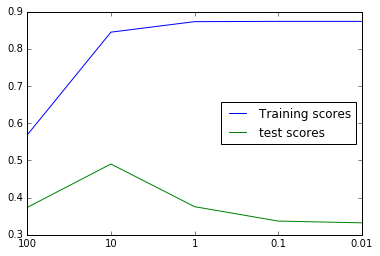

In [75]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .1, .01]:
    ridge=Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.figure()
plt.plot(training_scores, label='Training scores')
plt.plot(test_scores, label='test scores')

plt.legend(loc="best")
plt.xticks(range(5), [100, 10, 1, .1, .01])

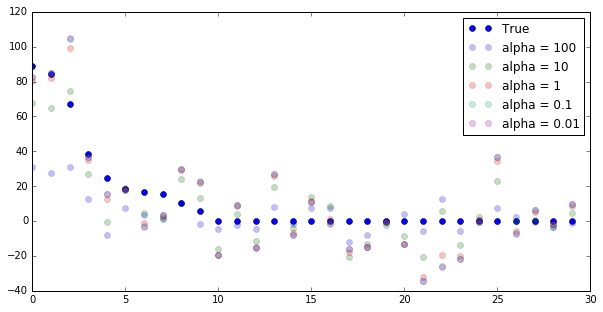

In [89]:
plt.figure(figsize=(10,5))
plt.plot(true_coefficient[coefficient_sorting], 'o', label='True', c='b')
for i, alpha in enumerate([100, 10, 1, .1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], 'o', label='alpha = {}'.format(alpha), alpha=0.25)
plt.legend(loc='best')


training set size :  [ 13  43  73 103 133]
training set size :  [ 13  43  73 103 133]


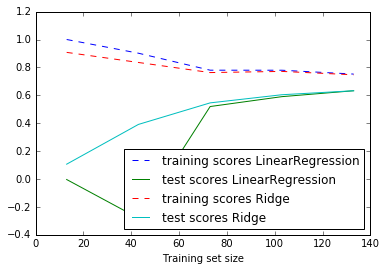

In [91]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)